In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ames = pd.read_csv('./datasets/train.csv', na_values = '', keep_default_na= False)
ames_test = pd.read_csv('./datasets/test.csv', na_values = '', keep_default_na= False)

# read_CSV takes the string 'NA' - which has meaning in this dataset - and makes it NaN.
# inspection of csv file shows that empty data is stored as ',,' which results in a zero-length sting when csv is parsed
# thus, the only true null value when reading this file should be the string ''

In [3]:
ames.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NA,IR1,Lvl,...,0,0,NA,NA,NA,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NA,IR1,Lvl,...,0,0,NA,NA,NA,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NA,Reg,Lvl,...,0,0,NA,NA,NA,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NA,Reg,Lvl,...,0,0,NA,NA,NA,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NA,IR1,Lvl,...,0,0,NA,NA,NA,0,3,2010,WD,138500


In [4]:
ames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            2051 non-null   object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

In [5]:
#Creates a list of columns with null values and the number of null values per column.

ames.isna().sum()[ames.isna().sum() > 0]

Lot Frontage      330
Mas Vnr Type       22
Mas Vnr Area       22
Bsmt Qual           1
Bsmt Cond           1
Bsmt Exposure       4
BsmtFin Type 1      1
BsmtFin SF 1        1
BsmtFin Type 2      2
BsmtFin SF 2        1
Bsmt Unf SF         1
Total Bsmt SF       1
Bsmt Full Bath      2
Bsmt Half Bath      2
Garage Yr Blt     114
Garage Finish       1
Garage Cars         1
Garage Area         1
Garage Qual         1
Garage Cond         1
dtype: int64

In [6]:
ames_test.isna().sum()[ames_test.isna().sum() > 0]

Lot Frontage     160
Mas Vnr Type       1
Mas Vnr Area       1
Electrical         1
Garage Yr Blt     45
Garage Finish      1
dtype: int64

**Notes**

Garage Year Built has many null values, likely for homes that have no garage.

Garage Year Built is, by itself, probably not a good indicator of home price. However, it may be worth creating a feature with this data to indicate if the garage was *original* to the home or added later.

In [7]:
ames.loc[ames['Yr Sold'] < ames['Year Built']]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
1885,2181,908154195,20,RL,128.0,39290,Pave,NA,IR1,Bnk,...,0,0,NA,NA,Elev,17000,10,2007,New,183850


''

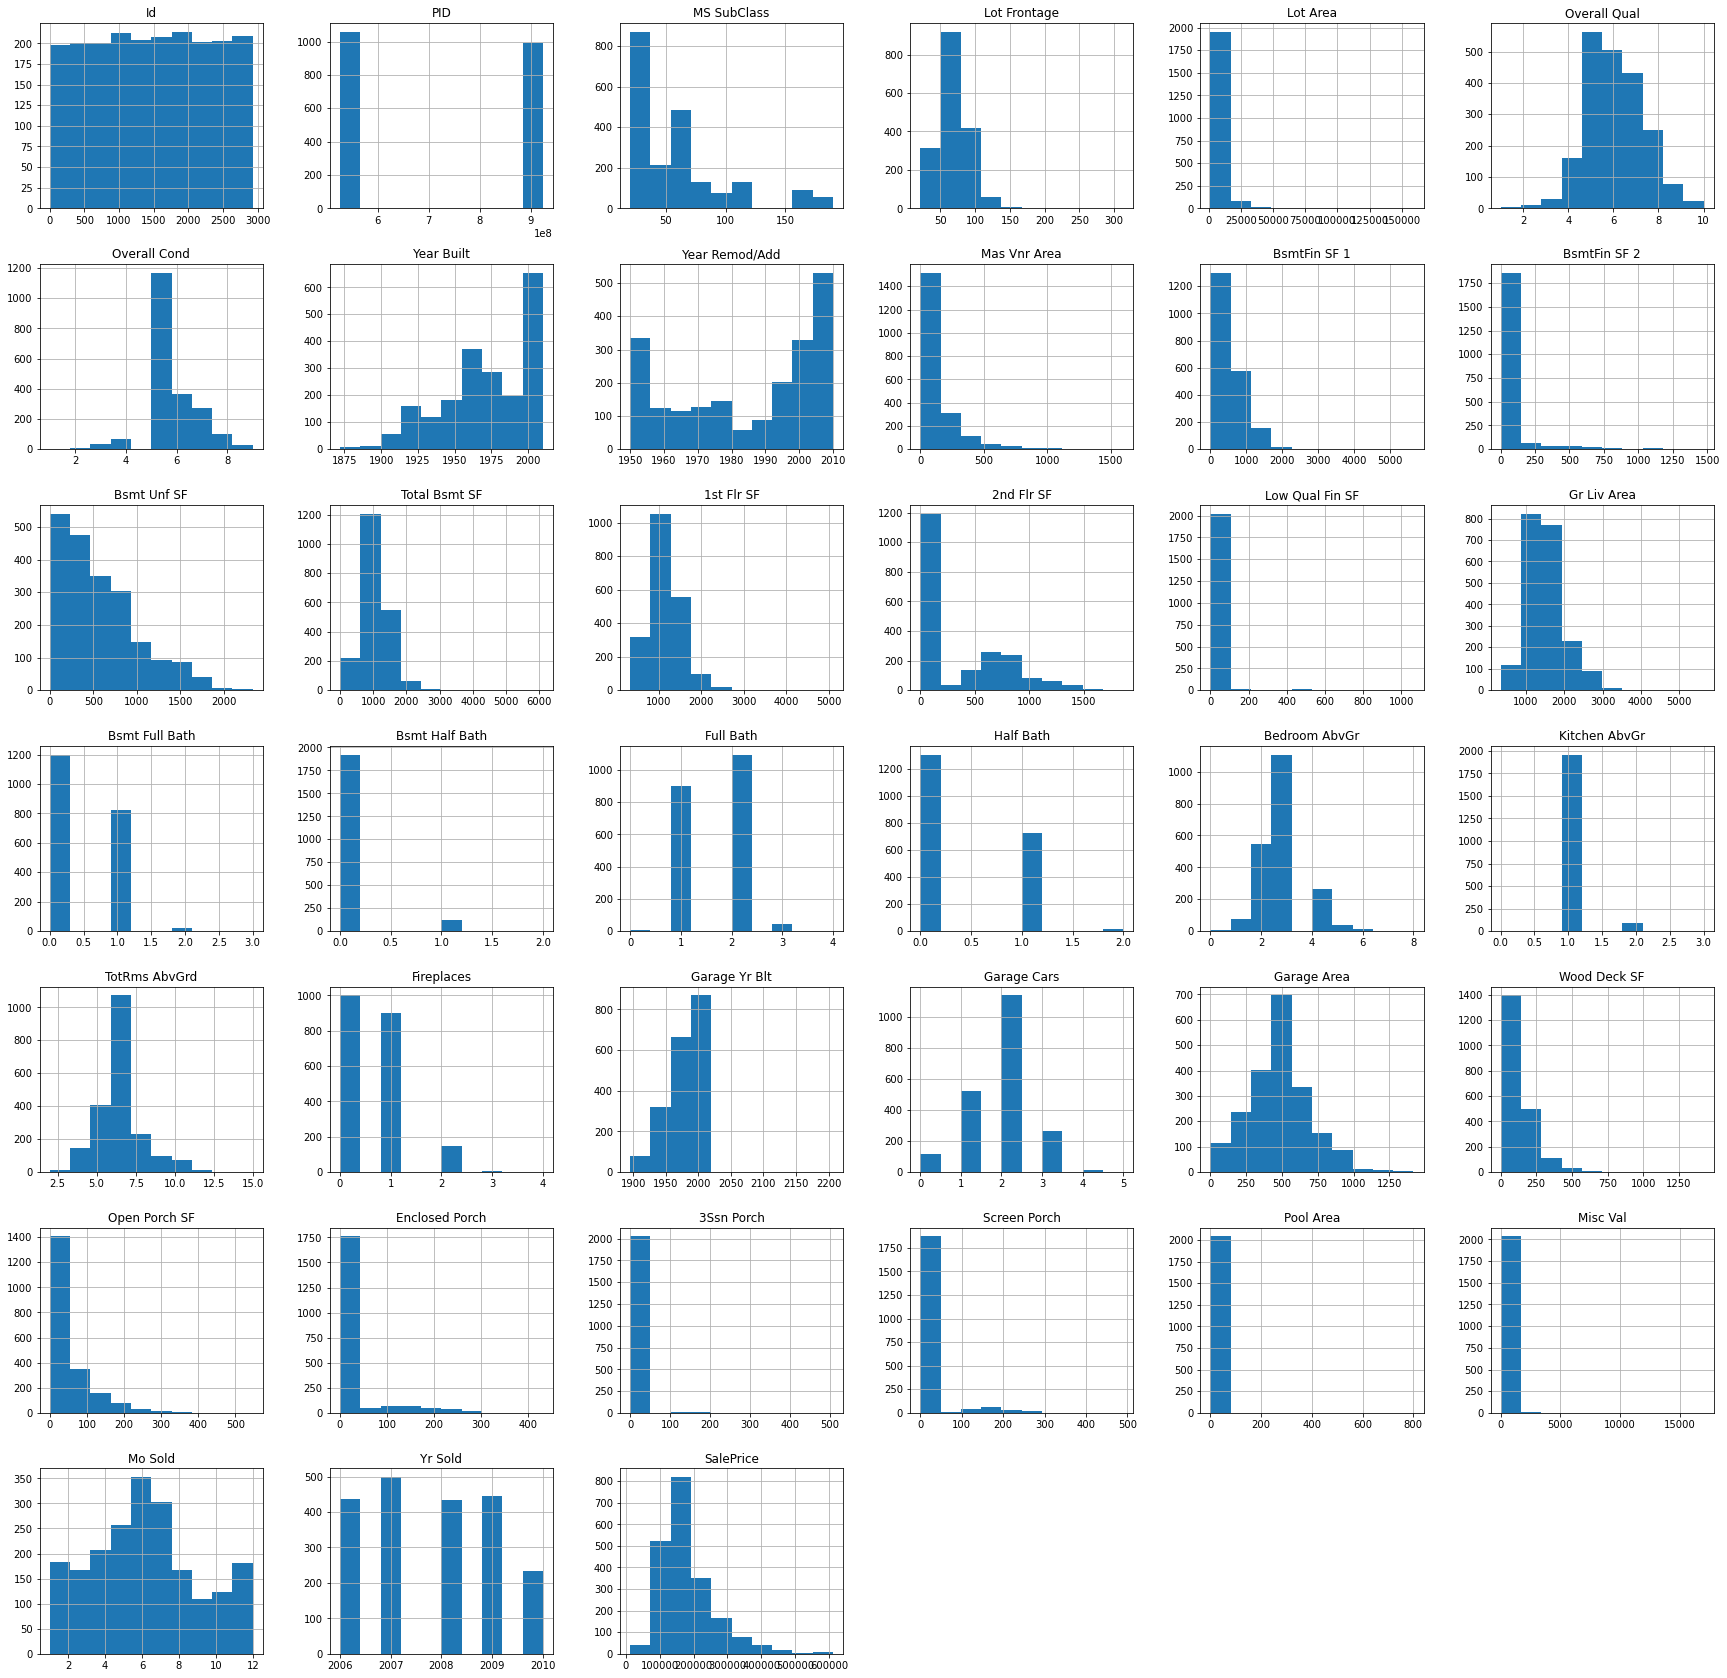

In [8]:
ames.hist(figsize = (30,30))

;

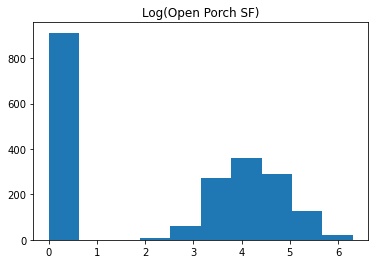

In [9]:
plt.hist(np.log(ames['Open Porch SF'] + 1))
plt.title("Log(Open Porch SF)");

#Trying to get the log of 0 results in -infinity.

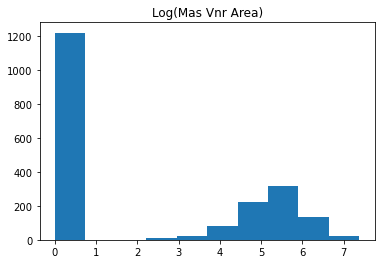

In [10]:
plt.hist(np.log(ames['Mas Vnr Area'] + 1))
plt.title("Log(Mas Vnr Area)");

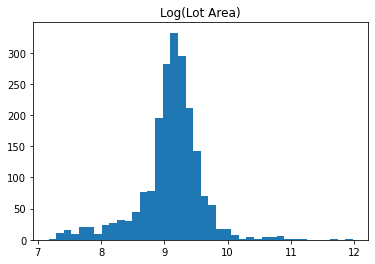

In [11]:
plt.hist(np.log(ames['Lot Area']), bins = 40)
plt.title("Log(Lot Area)");

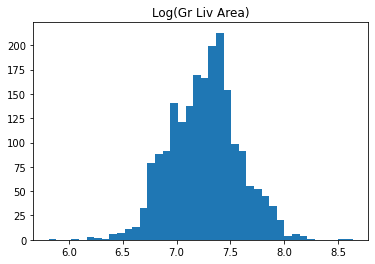

In [12]:
plt.hist(np.log(ames['Gr Liv Area']), bins = 40)
plt.title("Log(Gr Liv Area)");

In [13]:
ames[ames['Total Bsmt SF'] + ames['Gr Liv Area'] > 5000][['SalePrice', 'Total Bsmt SF', 'Gr Liv Area', 'Lot Area', 'Bldg Type', 'MS Zoning', 'MS SubClass', 'Overall Cond', 'Overall Qual', 'Yr Sold']]

,SalePrice,Total Bsmt SF,Gr Liv Area,Lot Area,Bldg Type,MS Zoning,MS SubClass,Overall Cond,Overall Qual,Yr Sold
30,278000,2524.0,2524,9600,1Fam,RL,20,5,8,2009
328,430000,3200.0,3228,12692,1Fam,RL,20,5,8,2007
960,160000,6110.0,5642,63887,1Fam,RL,60,5,10,2008
1117,466500,2633.0,2633,11400,1Fam,RL,20,5,10,2007
1164,555000,3094.0,2402,15431,1Fam,RL,20,5,10,2009
1227,500000,2846.0,2696,14300,1Fam,RL,20,5,9,2010
1389,410000,2033.0,3238,14720,1Fam,RL,50,5,8,2010
1692,584500,1733.0,3500,17242,1Fam,RL,60,5,9,2006
1700,485000,1926.0,3140,13518,1Fam,RL,60,5,9,2009
1885,183850,5095.0,5095,39290,1Fam,RL,20,5,10,2007


In [14]:
ames[ames['Lot Area'] > 30000]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
24,2339,527250040,190,RL,100.0,34650,Pave,NA,Reg,Bnk,...,0,0,NA,NA,NA,0,1,2006,WD,145000
108,2309,526303060,20,RL,NaN,39384,Pave,NA,IR1,Low,...,0,0,NA,NA,NA,0,10,2006,WD,252000
337,2283,923205025,190,RL,NaN,32463,Pave,NA,Reg,Low,...,0,0,NA,NA,NA,0,3,2007,WD,168000
441,1639,527226040,190,RL,195.0,41600,Pave,NA,IR1,Lvl,...,0,0,NA,NA,NA,0,11,2007,WD,155000
471,2116,906426060,50,RL,NaN,159000,Pave,NA,IR2,Low,...,0,0,NA,NA,Shed,500,6,2007,WD,277000
616,1498,908154080,20,RL,123.0,47007,Pave,NA,IR1,Lvl,...,0,0,NA,NA,NA,0,7,2008,WD,284700
635,2904,923125030,20,A (agr),125.0,31250,Pave,NA,Reg,Lvl,...,0,0,NA,NA,NA,0,5,2006,WD,81500
694,2072,905301050,20,RL,NaN,115149,Pave,NA,IR2,Low,...,0,0,NA,NA,NA,0,6,2007,WD,302000
745,315,916125360,20,RL,NaN,57200,Pave,NA,IR1,Bnk,...,0,0,NA,NA,NA,0,6,2010,WD,160000
823,16,527216070,60,RL,47.0,53504,Pave,NA,IR2,HLS,...,210,0,NA,NA,NA,0,6,2010,WD,538000
